# Investigation- Titanic Disaster

by **_ASHISH SAHU_** (June, 2017)

### Description:

_The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships._

_One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class._

![alt text](http://www.astrosurf.com/luxorion/Sciences/titanic-sinking.jpg)

### Analysis Overview:

The data set is in csv format and availbale in my repository.
The goal of this project is to perform **intoductory data analysis** on Titanic DataSet and documents my findings. We'll start by taking a look at dataset and brainstorming what questions we could answer using it. Then we'll use Python libraries to answer the questions we're most interested in, subsequently creating and sharing report of our analysis.

**Python librairies used-**
* [Pandas](http://pandas.pydata.org/)
* [Numpy](http://www.numpy.org/)
* [Matplotlib](https://matplotlib.org/)

**The set of questions we would like to infer in this analysis is as follows.**
1. _Does the available personal information we have about the passengers of titanic such as name help us in understanding the probabilty of survival of the passengers?_
2. _In such disasters, there is an expectation that the young people have a higher survival probabilty. How age was related to survival?_
3. _People were allocated based on 3 classes (Lower, middle and higher). Did class had any effect on survival?_

### Varibales Short Description:

| Variable |                                          Description |
|----------|-----------------------------------------------------:|
| survival |                           Survival (0 = No; 1 = Yes) |
| pclass   |           Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd |
| name     |                                      Passengers Name |
| sex      |                                                  Sex |
| age      |                                                  Age |
| sibsp    |                    Number of Siblings/Spouses Aboard |
| parch    |                    Number of Parents/Children Aboard |
| ticket   |                                        Ticket Number |
| fare     |                                       Passenger Fare |
| cabin    |                                                Cabin |
| embarked | Port(C = Cherbourg; Q = Queenstown; S = Southampton) |


### Feature type

* Ordinal: Pclass
* Continuous: Age, Fare
* Descrete: SibSp, Parch
* Categorical: Survived, Sex, and Embarked


### Importing libraies

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# data import and handling libraies
import numpy as np
import pandas as pd

# data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Visualisations
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
#Allows value of multiple statements at once
InteractiveShell.ast_node_interactivity = "all"

### Load and check the data

In [2]:
Titanic = pd.read_csv("titanic-data.csv")
# Preview the data
Titanic.head(3)
Titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# overview of whole data and column
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# proportion of overall paseenger who survived

survival_rate = float(Titanic['Survived'].sum())/ Titanic['Survived'].count()
survival_rate

# we see that only ~38% people were lucky to survive the disaster.

0.3838383838383838

**Lets run through the data summary and look for any missing values.**

In [6]:
Titanic.describe()
Titanic[['Age', 'Cabin', 'Embarked']].isnull().sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age         177
Cabin       687
Embarked      2
dtype: int64

** As we can see Age and cabing has lot of missing values in them, while Embarked has only two missing values.**  We can identify the passengers whose onboarding port imformation was missing. Who were they?

In [17]:
x = pd.isnull(Titanic.Embarked)
Titanic[x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### EDA focus on few variables

In [58]:
# Count of Survivors by Gender
survived_passengers = Titanic[Titanic['Survived']==1]['Sex'].value_counts()
dead_passengers = Titanic[Titanic['Survived']==0]['Sex'].value_counts()

survived_df =  pd.DataFrame([survived_passengers,dead_passengers])
survived_df.index = ['Survived','Dead']
survived_df

,female,male
Survived,233,109
Dead,81,468


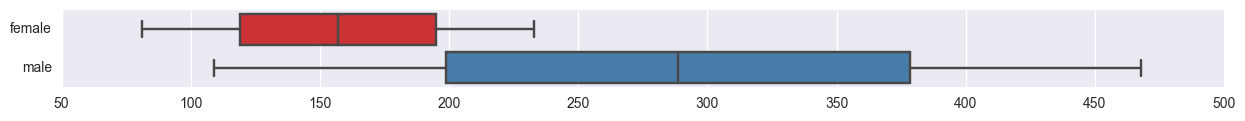

In [51]:
# let's see survival count using boxplot
plt.figure(figsize=(15,1))
sns.boxplot(data=survived_df, orient='h', palette="Set1");

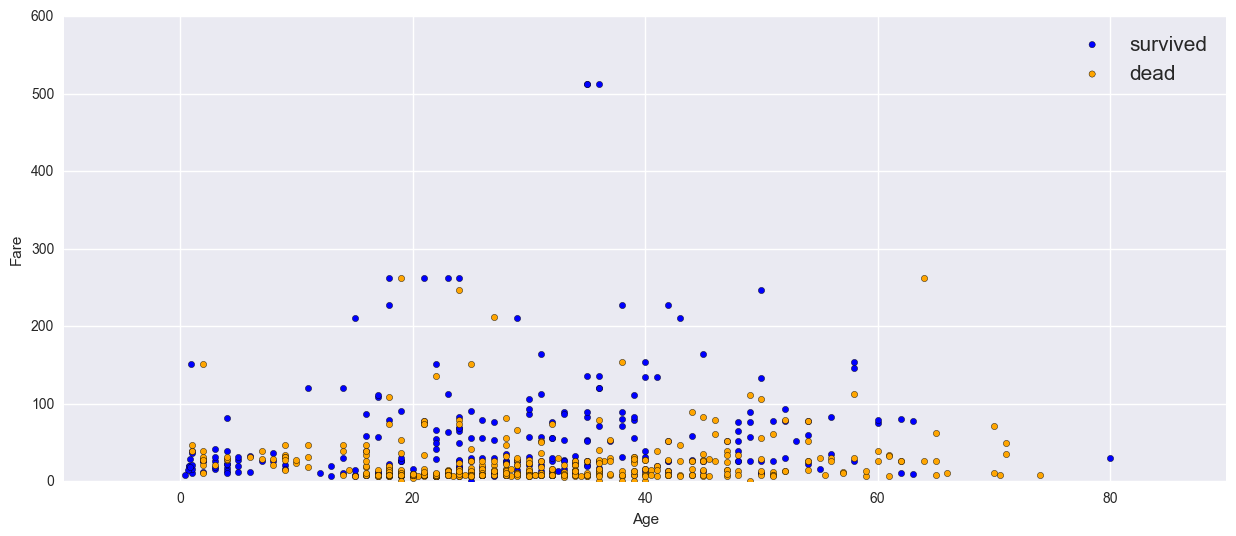

In [57]:
# Age Vs Fare Vs Survival
plt.figure(figsize=(15,6))
abc = plt.subplot()
abc.scatter(Titanic[Titanic['Survived']==1]['Age'],Titanic[Titanic['Survived']==1]['Fare'],c='blue',s=20)
abc.scatter(Titanic[Titanic['Survived']==0]['Age'],Titanic[Titanic['Survived']==0]['Fare'],c='orange',s=20)
abc.set_xlabel('Age')
abc.set_ylabel('Fare')
abc.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.ylim(0,None);

### Let's explore Age variable

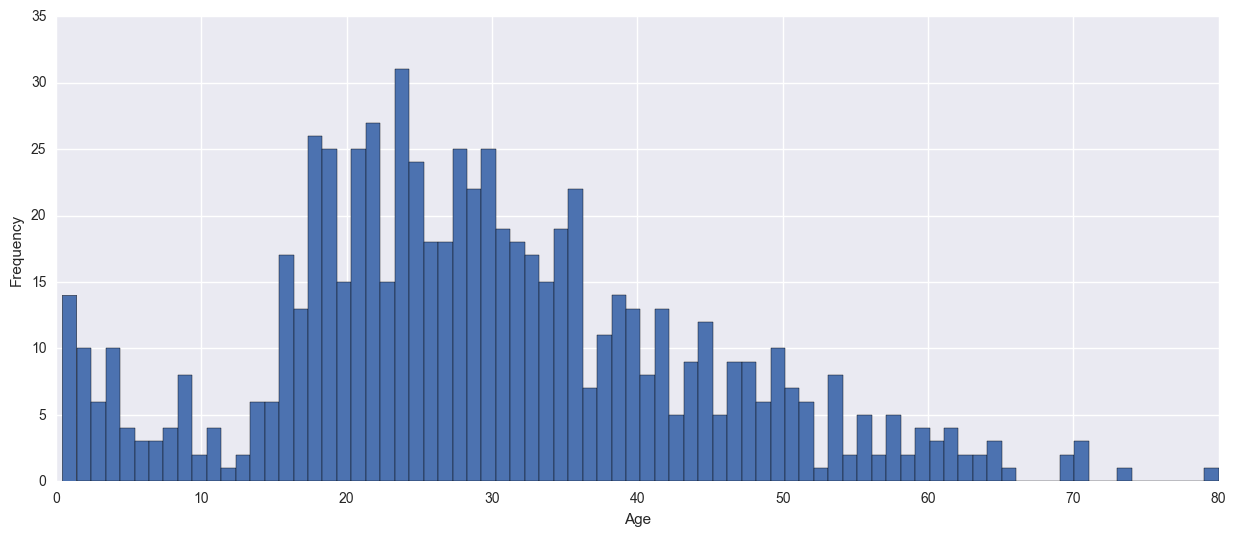

In [7]:
# Plot Age values on an histogram
fig = plt.figure(figsize=(15, 6))
Titanic['Age'].hist(bins=80) #bins=80 as ages range from 0 to 80 years old

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();

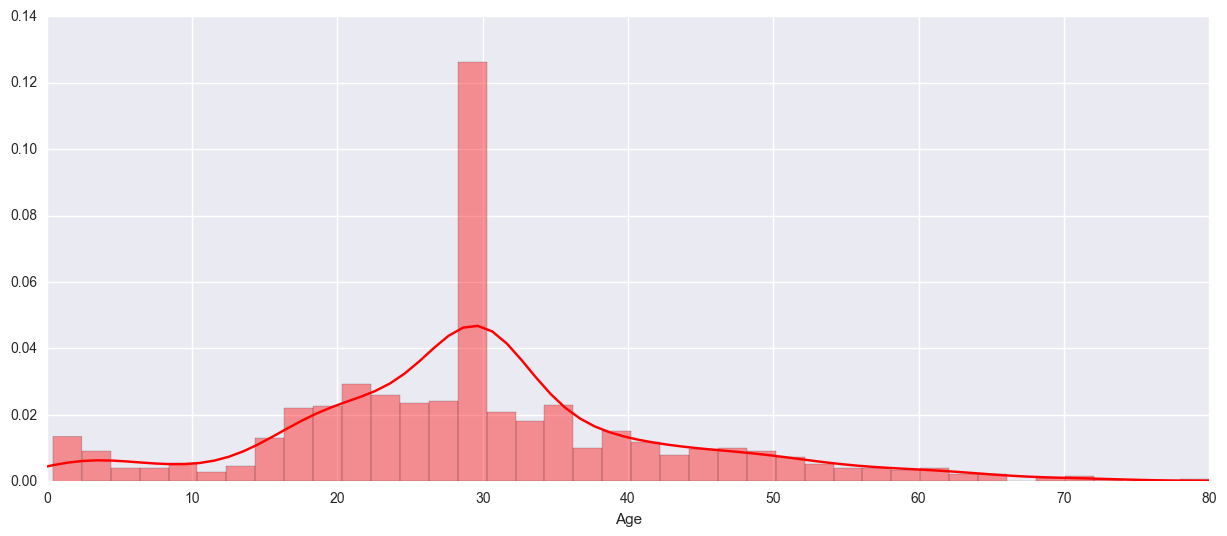

In [8]:
# we can do mean substitution for the age variable
meanAge = np.mean(Titanic.Age)
Titanic.Age = Titanic.Age.fillna(meanAge)

fig = plt.figure(figsize=(15, 6))
sns.distplot(Titanic.Age, bins = 40, color= 'red')
plt.xlim(0,80);

# plot after the mean age substitution

### Which class passengers had a lowest survival rate?

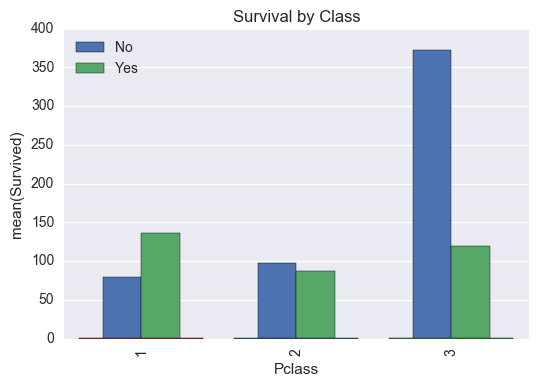

In [9]:
###### Class Vs Survival Chart ######

survival_by_class = Titanic.groupby(['Pclass', 'Survived']).size().unstack('Survived')
survival_by_class.columns = ['No', 'Yes']
survival_by_class.plot.bar(title='Survival by Class');

sns.barplot(Titanic["Pclass"], Titanic["Survived"], palette="Set1");

**Here we can see that most passengers who survived held the class 1 ticket (higher class), while majority of class 3 (lower class) people were unfortunate.**

** Let's check how family size and age factor has related.**

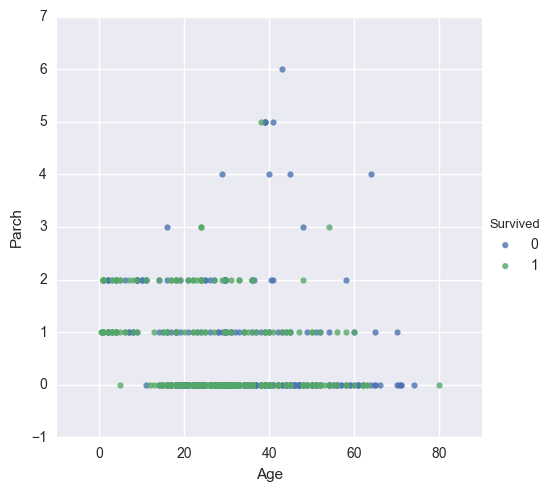

In [19]:
sns.lmplot(x='Age', y='Parch', data=Titanic, hue= 'Survived', fit_reg=False)

**We can see that bigger size family had very less chance of survival and probabaly they sank together.**

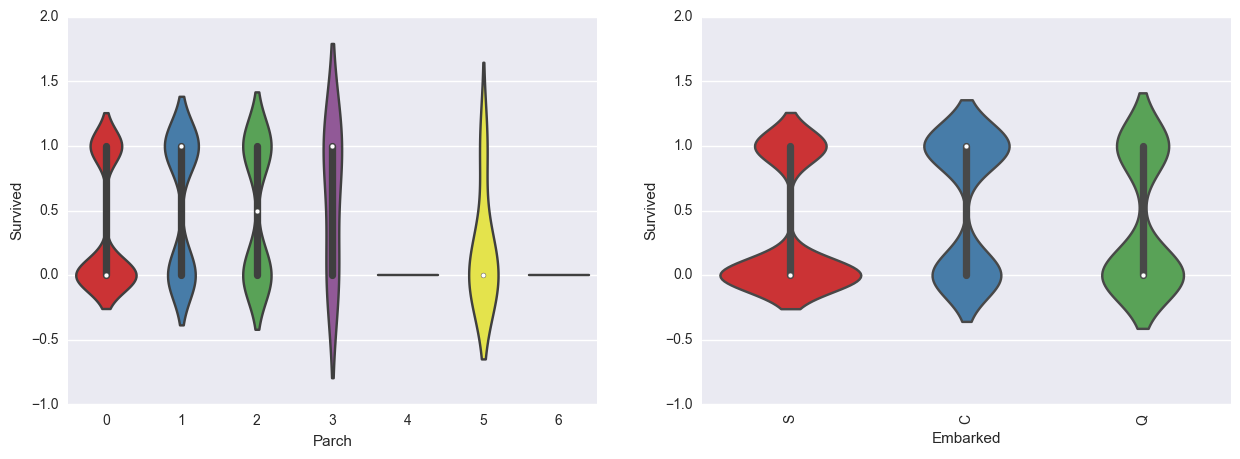

In [27]:
parch_survived = pd.crosstab(Titanic["Parch"],Titanic["Survived"])
pclass_survived = pd.crosstab(Titanic["Pclass"],Titanic["Survived"])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.violinplot(Titanic["Parch"], Titanic["Survived"], palette="Set1", ax=axis1)

sns.violinplot(Titanic["Embarked"], Titanic["Survived"], palette="Set1", ax=axis2)

plt.xticks(rotation=90);

### Extracting title from feature 'Name'

In [18]:
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df_surname = pd.DataFrame({'Title' : Titanic['Name'].apply(name_extract)})

Titanic = pd.merge(Titanic, df_surname, left_index=True, right_index=True)

pd.crosstab(Titanic.Sex, Titanic.Title)

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


So there are 4 main titles - Mr, Mrs, Master and Miss. We can cobine others as those are less in numbers

In [19]:
def geoup_titles(old_titles):
 if old_titles == 'Mr':
    return('Mr')
 else:
    if old_titles == 'Mrs':
       return('Mrs')
    else:
       if old_titles == 'Master':
          return('Master')
       else: 
          if old_titles == 'Miss':
             return('Miss')
          else:
             return('Others')
df_temp = pd.DataFrame({'New_Title':Titanic['Title'].apply(geoup_titles)})
Titanic = pd.merge(Titanic, df_temp, left_index = True, right_index = True)

temp1 = df_temp.groupby('New_Title').count()

** Now, we can check how many and from where this people embarked on their journey**

In [27]:
pd.crosstab(Titanic.Embarked, Titanic.New_Title)

New_Title,Master,Miss,Mr,Mrs,Others
Embarked,,,,,
C,5,38,85,31,9
Q,4,33,35,3,2
S,31,110,397,90,16


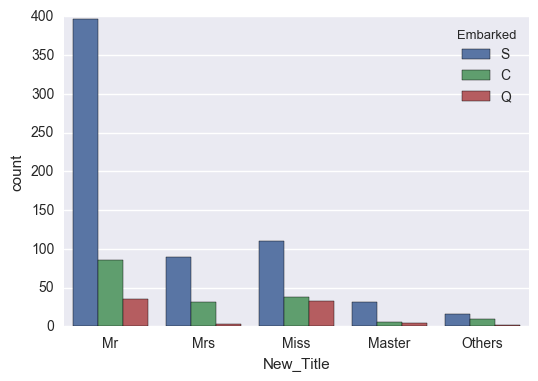

In [34]:
sns.countplot(data = Titanic, x = 'New_Title', hue='Embarked');

### Conclusion:

** Although much can be exolored using this dataset. There are few limitation where deriving an answer isn't possible here** :

* Handling missing values. The dataset is filled with missing values of the age. The missing age values are imputed with the mean, but we saw that the mean value is being massively over represented which is a limitation as this will effect potential statistical testing. First, there was only 12 columns of data to work with with essentially three of them being irrelevant. Additionally, there were only 891 rows of data, of which 179 were missing important fields such as age.

* The more the data, the better it can be analysed. For example there was no information in 'Name' Column that who were the crew and who were the passengers, how many life boats or security measures were present at that point of time. 

* The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.


**_Overall, during our analysis we saw that strongest evidence for survival was certainly explained by `Pclass` the passenger's socioeconomic class. Perhaps Upper class passengers being in upper deck cabins, had better access to the lifeboats which were brought near the first-class cabins at shortest of time when disaster struck, while the third-class had to bear the scarcity of lifeboats, causing more deaths._**

**Resources**
* Plottings side by side using [Matplotlib fig](https://matplotlib.org/api/figure_api.html) .
* seaborn scatter plot using [lmplot()](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)
* Python [Regular Expression](https://docs.python.org/2/library/re.html) for data munging
* How to display multiple output using Python [InteractiveShell](https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result/36835741)
